## Simple Epidemic Model

In [10]:
import numpy
import networkx
import random
import time as ttclock
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

%matplotlib inline

## Case 1 - Susceptible or infected - No immunity

Individuals can be in one of two states - `susceptible` or `infected` state. There is no immunity gained from the infection. There is no vaccine or quarantine measures.

In [12]:
def initialize_network(population_size, link_probability, initial_infected_ratio, susceptible=0, infected=1):
    pn = networkx.erdos_renyi_graph(population_size, link_probability)
    pos = networkx.random_layout(pn)
    for i in pn.nodes():
        if numpy.random.random() < initial_infected_ratio:
            pn.nodes[i]['state'] = infected
        else:
            pn.nodes[i]['state'] = susceptible
    
    return pn,pos

In [13]:
def step(network, infection_probability, recovery_probability, susceptible=0, infected=1):
    next_network = network.copy()
    for i in network.nodes():
        if network.nodes[i]['state'] == susceptible:
            next_network.nodes[i]['state'] = susceptible
            for j in network.neighbors(i):
                if network.nodes[j]['state'] == infected:
                    if random.random() < infection_probability:
                        next_network.nodes[i]['state'] = infected
                        break
        else:
            if random.random() < recovery_probability:
                next_network.nodes[i]['state'] = susceptible
            else:
                next_network.nodes[i]['state'] = infected
                
    return next_network

In [14]:
def run(network, infection_probability, recovery_probability, niterations, susceptible=0, infected=1):
    total_infected = []
    iteration = 0
    persons_infected = [n for n in network.nodes() if network.nodes[n]['state']==infected]
    total_infected.append(len(persons_infected))
    while iteration < niterations:
        iteration += 1
        next_network = step(network, infection_probability, recovery_probability)
        persons_infected = [n for n in next_network.nodes() if next_network.nodes[n]['state']==infected]
        total_infected.append(len(persons_infected))
        network = next_network.copy()
        
    return total_infected

In [19]:
population_size = 20
link_probability = 0.05
initial_infected_ratio = 0.2
infection_probability = 0.2
recovery_probability = 0.25
susceptible = 0
infected = 1

network, positions = initialize_network(population_size, link_probability, initial_infected_ratio)
total_infected = run(network, infection_probability, recovery_probability, 100)

Text(0, 0.5, 'Total infected persons')

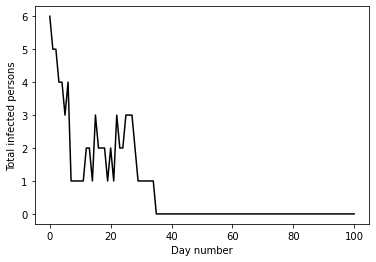

In [20]:
fig = plt.figure()
ax = fig.add_subplot()

x = numpy.arange(0, len(total_infected))
y = numpy.array(total_infected)

ax.plot(x, y, color='k')
ax.set_xlabel('Day number')
ax.set_ylabel('Total infected persons')

## Case 2 - Immunity + sickness time

* An infected person stays infected for a period of time
* A recovered person has immunity for a certain period of time

In [35]:
def step(network, infection_probability, recovery_probability, infected_period=5, immunity_period=15, 
         susceptible=0, infected=1):
    next_network = network.copy()
    for i in network.nodes():
        if network.nodes[i]['state'] == susceptible:
            next_network.nodes[i]['state'] = susceptible
            for j in network.neighbors(i):
                if network.nodes[j]['state'] == infected:
                    if random.random() < infection_probability:
                        next_network.nodes[i]['state'] = infected
                        break
                else:
                    if random.random() < 0.2 * infection_probability:
                        next_network.nodes[i]['state'] = infected
            
        elif network.nodes[i]['state'] > infected_period:
            if random.random() < recovery_probability:
                next_network.nodes[i]['state'] = -immunity_period
            else:
                next_network.nodes[i]['state'] += 1
        elif network.nodes[i]['state'] < 0:
            next_network.nodes[i]['state'] += 1
        elif network.nodes[i]['state'] >= 1:
            next_network.nodes[i]['state'] += 1
                           
    return next_network

In [46]:
def run(network, infection_probability, recovery_probability, niterations,
        infected_period=5, immunity_period=15, susceptible=0, infected=1):
    total_infected = []
    total_immune = []
    total_susceptible = []
    iteration = 0
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot()    
    persons_infected = [n for n in network.nodes() if network.nodes[n]['state']==infected]
    total_infected.append(len(persons_infected))
    total_immune.append(0)
    total_susceptible.append(len(network.nodes())-len(persons_infected))
    while iteration < niterations:
        iteration += 1
        next_network = step(network, infection_probability, recovery_probability, infected_period, immunity_period)
        persons_infected = [n for n in next_network.nodes() if next_network.nodes[n]['state'] > 0]
        persons_immune = [n for n in next_network.nodes() if next_network.nodes[n]['state'] < 0]
        persons_susceptible = [n for n in next_network.nodes() if next_network.nodes[n]['state'] == 0]
        total_infected.append(len(persons_infected))
        total_immune.append(len(persons_immune))
        total_susceptible.append(len(persons_susceptible))
        network = next_network.copy()
        networkx.draw(network, pos=positions, node_color=[network.nodes[i]['state'] for i in network.nodes()], 
              edge_color='k', ax=ax)
        ax.set_title(f't = {iteration}')
        display(fig)
        clear_output(wait = True)
        plt.pause(1)
        
    return total_infected, total_immune, total_susceptible

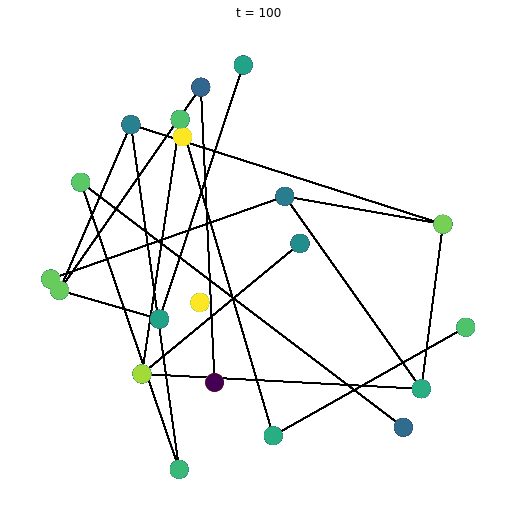

In [47]:
population_size = 20
link_probability = 0.10
initial_infected_ratio = 0.2
infection_probability = 0.5
recovery_probability = 0.25
infected_period = 5
immunity_period = 45
susceptible = 0
infected = 1

network, positions = initialize_network(population_size, link_probability, initial_infected_ratio)
total_infected, total_immune, total_susceptible = run(network, infection_probability, recovery_probability, 100, 
                                                      infected_period, immunity_period)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

x = numpy.arange(0, len(total_infected))
yinf = numpy.array(total_infected)
yimm = numpy.array(total_immune)
ysus = numpy.array(total_susceptible)

ax.plot(x, yinf, color='r', label='infected')
ax.plot(x, yimm, color='g', label='immune')
ax.plot(x, ysus, color='b', label='susceptible')
ax.set_xlabel('Day number')
ax.set_ylabel('State counts')

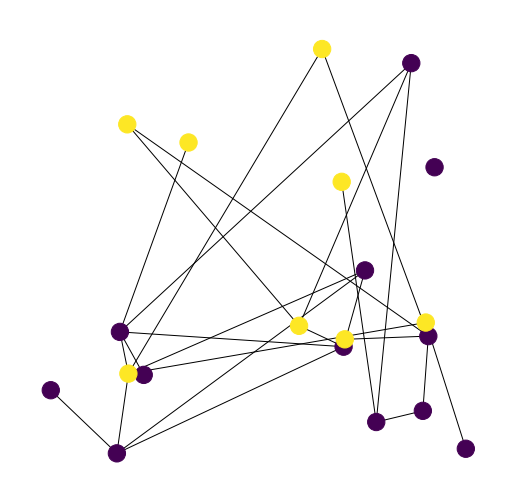

In [43]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot()
networkx.draw(network, pos=positions, node_color=[network.nodes[i]['state'] for i in network.nodes()], 
              edge_color='k', ax=ax)